# Problem statement

Build the Model to predict wheather the player can play the game or not 
     

*   Clean the dataset
*   Apply PCA 
*   Build the model LogisticRegression and RandomForestClassifier






# Importing library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Data set/nba_final.csv")
data.head()

,Rk,Player.x,Player_ID,Pos1,Pos2,Age,Tm,G,GS,MP,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,A.J. Hammons,hammoaj01,C,NaN,24,DAL,22,0,7.4,...,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,Aaron Brooks,brookaa01,PG,NaN,32,IND,65,0,13.8,...,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,Aaron Gordon,gordoaa01,SF,NaN,21,ORL,80,72,28.7,...,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
3,352,Adreian Payne,paynead01,PF,NaN,25,MIN,18,0,7.5,...,West,Front,861,120,1.0,52.0,NaN,NaN,75.5,No
4,10,Al-Farouq Aminu,aminual01,PF,NaN,26,POR,61,25,29.1,...,West,Front,4971,69,7.0,23.0,NaN,NaN,42.8,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          1408 non-null   int64  
 1   Player.x    1408 non-null   object 
 2   Player_ID   1408 non-null   object 
 3   Pos1        1408 non-null   object 
 4   Pos2        12 non-null     object 
 5   Age         1408 non-null   int64  
 6   Tm          1408 non-null   object 
 7   G           1408 non-null   int64  
 8   GS          1408 non-null   int64  
 9   MP          1408 non-null   float64
 10  FG          1408 non-null   float64
 11  FGA         1408 non-null   float64
 12  FG.         1404 non-null   float64
 13  X3P         1408 non-null   float64
 14  X3PA        1408 non-null   float64
 15  X3P.        1309 non-null   float64
 16  X2P         1408 non-null   float64
 17  X2PA        1408 non-null   float64
 18  X2P.        1393 non-null   float64
 19  eFG.        1404 non-null  

In [ ]:
data.shape

(1408, 45)

# Data Cleaning

In [ ]:
data.isnull().sum()

Rk               0
Player.x         0
Player_ID        0
Pos1             0
Pos2          1396
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG.              4
X3P              0
X3PA             0
X3P.            99
X2P              0
X2PA             0
X2P.            15
eFG.             4
FT               0
FTA              0
FT.             47
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Salary          62
mean_views     138
Season           0
Conference       0
Role             0
Fvot             0
FRank            0
Pvot           159
PRank          159
Mvot           404
MRank          404
Score            0
Play             0
dtype: int64

In [ ]:
a=["Pos2","X3P.","X2P.","FT.","Salary","mean_views","Pvot","PRank","Mvot","MRank","eFG.","FG."]
for i in a:
  b=data[i].unique()
  print(i,b,"\n") 

Pos2 [nan 'C' 'SG' 'SF' 'PF'] 

X3P. [0.5   0.375 0.288 0.2   0.33  0.355 0.    0.318 0.329 0.381 0.25  0.444
 0.409   nan 0.286 0.362 0.245 0.276 0.185 0.356 0.299 0.308 0.391 0.411
 0.371 0.39  0.382 0.344 0.336 0.4   0.333 0.367 0.247 0.404 0.294 0.313
 0.324 0.386 0.346 0.321 0.413 0.305 0.314 0.359 0.269 0.143 0.421 0.229
 0.401 0.352 0.347 0.37  0.389 0.379 0.392 0.295 0.311 0.453 0.417 0.261
 0.399 0.056 0.266 0.361 0.341 1.    0.34  0.351 0.363 0.3   0.273 0.217
 0.309 0.328 0.395 0.378 0.234 0.293 0.277 0.284 0.31  0.274 0.315 0.132
 0.335 0.372 0.353 0.263 0.373 0.42  0.403 0.083 0.272 0.405 0.398 0.374
 0.36  0.267 0.358 0.429 0.365 0.255 0.334 0.388 0.47  0.343 0.167 0.474
 0.427 0.275 0.357 0.281 0.366 0.385 0.441 0.337 0.327 0.419 0.407 0.27
 0.306 0.303 0.38  0.354 0.35  0.222 0.433 0.414 0.451 0.412 0.118 0.189
 0.447 0.236 0.211 0.331 0.283 0.237 0.111 0.408 0.396 0.418 0.148 0.319
 0.348 0.316 0.368 0.342 0.307 0.349 0.434 0.515 0.538 0.393 0.376 0.339
 0.323 0.384 0.

In [ ]:
m=["X3P.","X2P.","FT.","Salary","mean_views","Pvot","PRank","Mvot","eFG.","FG."]
for i in m:
  data[i].fillna(data[i].mean(),inplace=True)

In [ ]:
data["MRank"].fillna(data["MRank"].median(),inplace=True)

In [ ]:
data=data.drop("Pos2",axis=1)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data=data.drop("Player.x",axis=1)

In [ ]:
data=data.drop("Player_ID",axis=1)

In [ ]:
data["Play"].value_counts()

No     1335
Yes      73
Name: Play, dtype: int64

#Encoding

In [ ]:
a=["Pos1","Tm","Season","Conference" ,"Role","Play"]
for i in a:
  b=data[i].unique()
  print(i,b,"\n") 

Pos1 ['C' 'PG' 'SF' 'PF' 'SG'] 

Tm ['DAL' 'IND' 'ORL' 'MIN' 'POR' 'BOS' 'LAC' 'PHO' 'UTA' 'OKC' 'NOP' 'DEN'
 'GSW' 'DET' 'CLE' 'MEM' 'BRK' 'CHI' 'SAC' 'HOU' 'WAS' 'LAL' 'CHO' 'TOR'
 'SAS' 'NYK' 'PHI' 'ATL' 'MIA' 'MIL'] 

Season ['2016-17' '2017-18' '2018-19'] 

Conference ['West' 'Est'] 

Role ['Front' 'Back'] 

Play ['No' 'Yes'] 



In [ ]:
data_dummy = pd.get_dummies(data, columns = ['Pos1',"Season","Conference","Role","Play"], drop_first = True)

In [ ]:
data=data_dummy

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data["Tm"] = le.fit_transform(data["Tm"])      #-------for specific column


In [ ]:
data.head()

,Rk,Age,Tm,G,GS,MP,FG,FGA,FG.,X3P,...,Score,Pos1_PF,Pos1_PG,Pos1_SF,Pos1_SG,Season_2017-18,Season_2018-19,Conference_West,Role_Front,Play_Yes
0,170,24,6,22,0,7.4,0.8,1.9,0.405,0.2,...,83.5,0,0,0,0,0,0,1,1,0
1,58,32,11,65,0,13.8,1.9,4.6,0.403,0.7,...,48.2,0,1,0,0,0,0,0,0,0
2,157,21,21,80,72,28.7,4.9,10.8,0.454,1.0,...,40.0,0,0,1,0,0,0,0,1,0
3,352,25,17,18,0,7.5,1.3,3.0,0.426,0.2,...,75.5,1,0,0,0,0,0,1,1,0
4,10,26,24,61,25,29.1,3.0,7.6,0.393,1.1,...,42.8,1,0,0,0,0,0,1,1,0


# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop("Play_Yes",axis = 1) 

In [ ]:
y= data["Play_Yes"]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42 )

# Feature Scalling 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
sc.fit(X_train)  
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc  = pd.DataFrame(X_train_sc)

# Model Building

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9801136363636364


## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X_train_sc,y_train)
y_pred = model2.predict(X_test_sc)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9914772727272727


# Scalling Data for PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_new = sc.fit_transform(X)

In [ ]:
print(X_new.T.shape)

(45, 1408)


In [ ]:
cov_mat = np.cov(X_new.T)

In [ ]:
eig_vals, eig_vecs  = np.linalg.eig(cov_mat)

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse = True)]

In [ ]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 35.59936376,  46.45566684,  52.62584104,  57.22439377,
        61.31528756,  64.82820251,  68.18429765,  71.27585023,
        74.10468662,  76.78394413,  79.17386088,  81.21990785,
        83.2188238 ,  84.96574115,  86.64605359,  88.16092192,
        89.50942904,  90.55717816,  91.54941835,  92.52892046,
        93.35568993,  94.13435278,  94.8825744 ,  95.5613018 ,
        96.16497474,  96.74978117,  97.30269572,  97.82758878,
        98.30776831,  98.71233719,  99.09465363,  99.36487638,
        99.53614634,  99.65182229,  99.75996543,  99.8433281 ,
        99.8968267 ,  99.94277515,  99.96993971,  99.98625736,
        99.99857915,  99.99918001,  99.99967597,  99.99987311,
       100.        ])

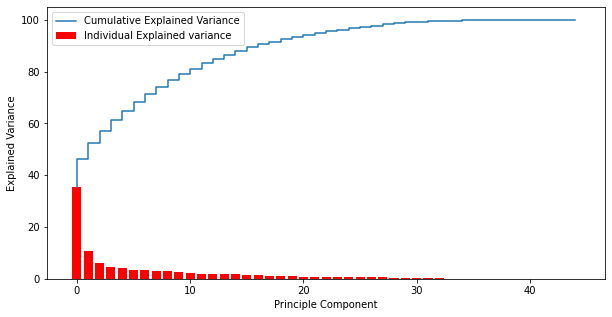

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(range(len(var_exp)), var_exp, label = "Individual Explained variance", color = 'red')
plt.step(range(len(cum_var_exp)), cum_var_exp, label = "Cumulative Explained Variance")
plt.ylabel("Explained Variance")
plt.xlabel("Principle Component")
plt.legend()
plt.show()

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 15)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [ ]:
pca_train.shape

(1056, 15)

In [ ]:
X_train.shape

(1056, 45)

## Model Building

### LogisticRegression

In [ ]:
model1 = LogisticRegression()
model1.fit(pca_train,y_train)
y_pred = model1.predict(pca_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9176136363636364


### RandomForestClassifier

In [ ]:
model4 = RandomForestClassifier(n_estimators = 100)
model4.fit(pca_train,y_train)
y_pred = model4.predict(pca_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9801136363636364
